<a href="https://colab.research.google.com/github/Sorin9202/SOLUX_summer_data/blob/master/4%EC%A3%BC%EC%B0%A8/Bike%20Sharing%20Demand-EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"print030","key":"667022dc85abc597ad1b21ff0906e714"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [5]:
!kaggle competitions download -c bike-sharing-demand

  0% 0.00/633k [00:00<?, ?B/s]
100% 633k/633k [00:00<00:00, 87.6MB/s]
  0% 0.00/140k [00:00<?, ?B/s]
100% 140k/140k [00:00<00:00, 45.8MB/s]
  0% 0.00/316k [00:00<?, ?B/s]
100% 316k/316k [00:00<00:00, 104MB/s]


In [20]:
import matplotlib.font_manager as fm  # 폰트 관련 용도

In [18]:
print(mpl.__version__)
print(mpl.__file__)
print(mpl.get_configdir())
print(mpl.get_cachedir())

3.2.2
/usr/local/lib/python3.6/dist-packages/matplotlib/__init__.py
/root/.config/matplotlib
/root/.cache/matplotlib


In [21]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 17
['/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-BoldItalic.ttf', '/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/liberation/Libe

In [23]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 54 not upgraded.
Need to get 0 B/9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 144487 fi

In [24]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 27
nanum_font number: 10


In [25]:
nanum_font

['/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf']

In [13]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

# Bike Sharing Demand

분류와 회기 중 회기와 관련 된 문제 => 자전거 대여량을 예측하는 문제이기 때문에

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 그래프를 그리기 위해서
%matplotlib inline

#그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일을 사용
plt.style.use('ggplot')

#그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv('train.csv', parse_dates = ["datetime"]) #datetime 형식으로 불러옴
train.shape

(10886, 12)

In [4]:
#train.columns 칼럼만 나옴
#train.dytpes 칼럼에 대한 데이터타입
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [5]:
train.head() 

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.temp.describe() #기온

count    10886.00000
mean        20.23086
std          7.79159
min          0.82000
25%         13.94000
50%         20.50000
75%         26.24000
max         41.00000
Name: temp, dtype: float64

In [7]:
train.isnull().sum() #null인 데이터가 있는지 확인

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

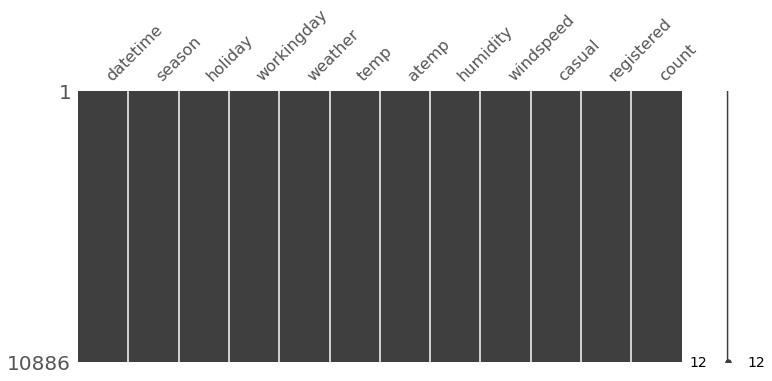

In [8]:
#null인 데이터들이 있는지 시각화
import missingno as msno

msno.matrix(train, figsize=(12,5))

In [9]:
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second
train.shape

(10886, 18)

In [10]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


[Text(0, 0.5, 'hour'), Text(0.5, 1.0, '시간별 대여량')]

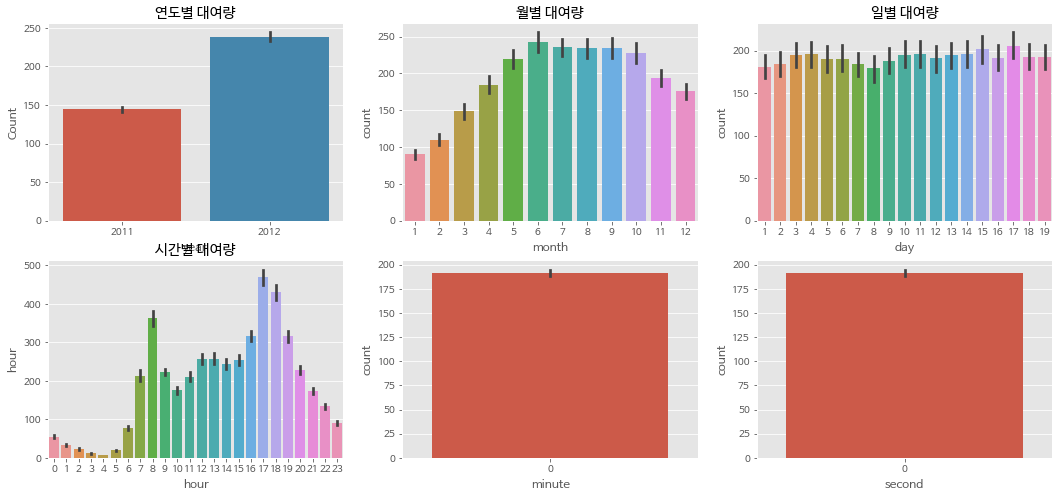

In [14]:
# 시간별 데이터에 따라 대여량이 얼마나 되는지 시각화
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows = 2, ncols = 3)
figure.set_size_inches(18,8)

sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)
sns.barplot(data = train, x = "day", y = "count", ax = ax3)
sns.barplot(data = train, x = "hour", y = "count", ax = ax4)
sns.barplot(data = train, x = "minute", y = "count", ax = ax5)
sns.barplot(data = train, x = "second", y = "count", ax = ax6)

ax1.set(ylabel = 'Count', title = "연도별 대여량")
ax2.set(xlabel = 'month', title = "월별 대여량")
ax3.set(xlabel = 'day', title = "일별 대여량")
ax4.set(ylabel = 'hour', title = "시간별 대여량")

- 연도별 대여량은 2011년보다 2012년이 더 많다.
- 월별 대여량은 6월에 가장 높게 나타났고 7 ~ 10월도 상당히 높게 나타났다. 1월이 가장 낮은 수치를 보였다.
- 일별 대여량은 1일부터 19일까지만 있고 나머지 날짜는 test.csv에 있다. 그래서 이 데이터를 피쳐로 사용해서는 안된다.
- 시간 대 대여량을 보면 출퇴근 시간에 대여량이 가장 많은 것으로 보인다. 하지만 주말과 나누어 볼 필요가 있다.
- 분, 초 모두 0으로 기록되어 있기 때문에 의미가 없다.

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, '근무일 여부에 따른 대여량')]

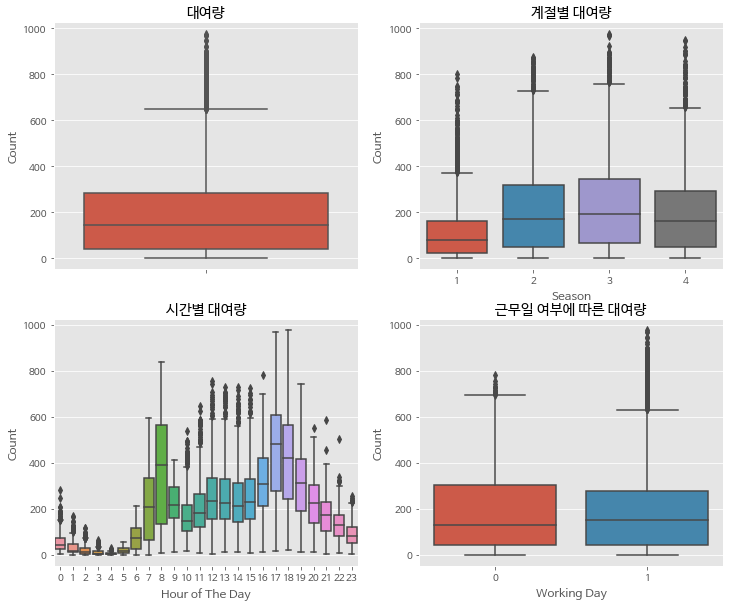

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2)
fig.set_size_inches(12,10)
sns.boxplot(data = train, y = "count", orient = "v", ax = axes[0][0]) #orient를 v로 설정하면 세로 그림을 그릴 수 있다.
sns.boxplot(data = train, y = "count", x = "season", orient = "v", ax = axes[0][1])
sns.boxplot(data = train, y = "count", x = "hour", orient = "v", ax = axes[1][0])
sns.boxplot(data = train, y = "count", x = "workingday", orient = "v", ax = axes[1][1])

axes[0][0].set(ylabel = "Count", title = "대여량")
axes[0][1].set(xlabel = "Season", ylabel = "Count", title = "계절별 대여량")
axes[1][0].set(xlabel = "Hour of The Day",  ylabel = "Count", title = "시간별 대여량")
axes[1][1].set(xlabel = "Working Day",  ylabel = "Count", title = "근무일 여부에 따른 대여량")

In [19]:
train["dayofweek"] = train["datetime"].dt.dayofweek
train.shape

(10886, 19)

In [20]:
train["dayofweek"].value_counts() #0부터 6까지 요일을 뜻함

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

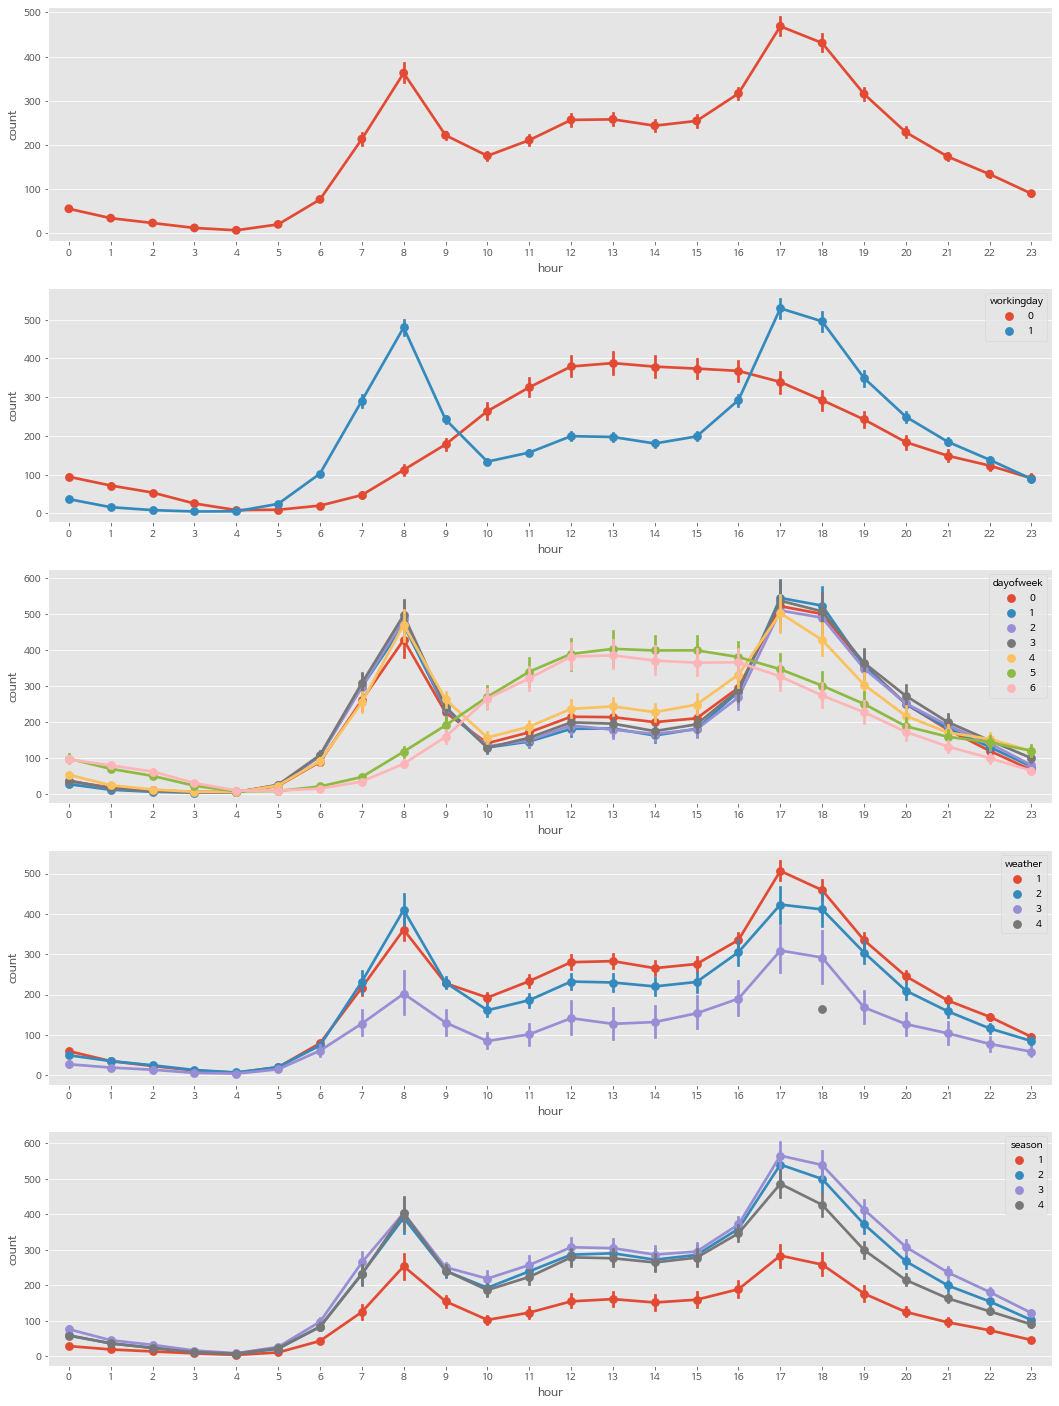

In [21]:
#row를 5로 주어 다섯 개의 그래프를 모아서 그린다
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 5)
fig.set_size_inches(18,25)

sns.pointplot(data = train, x = "hour", y = "count", ax = ax1)

sns.pointplot(data = train, x = "hour", y = "count", hue = "workingday", ax = ax2)

sns.pointplot(data = train, x = "hour", y = "count", hue = "dayofweek", ax = ax3)

sns.pointplot(data = train, x = "hour", y = "count", hue = "weather", ax = ax4)

sns.pointplot(data = train, x = "hour", y = "count", hue = "season", ax = ax5)

In [22]:
corrMatt = train[["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"]]
corrMatt = corrMatt.corr()
print(corrMatt)

mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

                temp     atemp    casual  ...  humidity  windspeed     count
temp        1.000000  0.984948  0.467097  ... -0.064949  -0.017852  0.394454
atemp       0.984948  1.000000  0.462067  ... -0.043536  -0.057473  0.389784
casual      0.467097  0.462067  1.000000  ... -0.348187   0.092276  0.690414
registered  0.318571  0.314635  0.497250  ... -0.265458   0.091052  0.970948
humidity   -0.064949 -0.043536 -0.348187  ...  1.000000  -0.318607 -0.317371
windspeed  -0.017852 -0.057473  0.092276  ... -0.318607   1.000000  0.101369
count       0.394454  0.389784  0.690414  ... -0.317371   0.101369  1.000000

[7 rows x 7 columns]


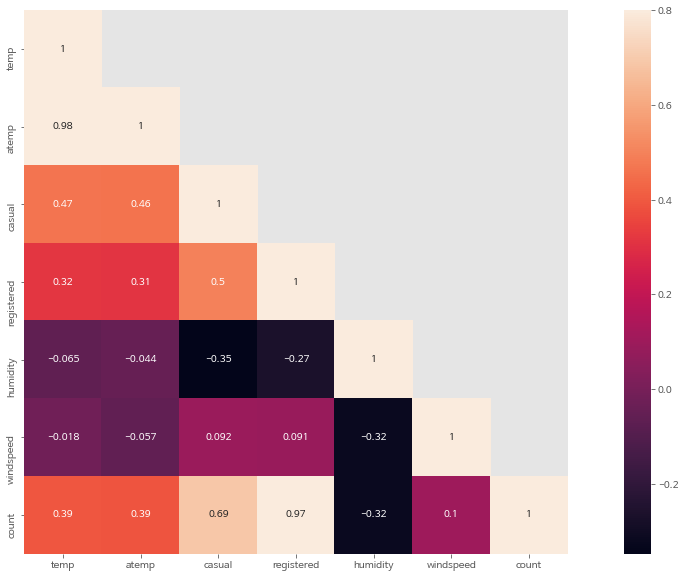

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask = mask, vmax = .8, square = True, annot = True) #annot은 각 칸에 숫자 입력, 

- 온도, 습도, 풍속은 거의 연관 관계가 없다.
- 대여량과 가장 연관이 높은 건 registered 로 등록된 대여자가 많지만, test 데이터에는 이 값이 없다. 따라서 피처로 사용하기에는 적합하지 않다.
- atemp와 temp는 0.98로 상관관계가 높지만, 온도와 체감온도로 피처로 사용하기에 적합하지 않을 수 있다.

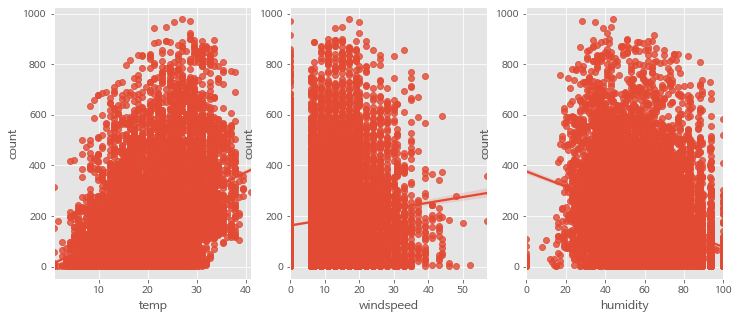

In [24]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3) #3개의 그래프 그릴 것
fig.set_size_inches(12, 5)
sns.regplot(x = "temp", y = "count", data = train, ax = ax1)
sns.regplot(x = "windspeed", y = "count", data = train,ax = ax2)
sns.regplot(x = "humidity", y = "count", data = train,ax = ax3)

- 풍속의 경우 0에 숫자가 몰려 있는 것으로 보인다. 추측하건데 관측되지 않은 수치에 대하여 0으로 표시한 게 아닌가 싶다.

In [25]:
#년도와 월별 데이터를 붙여서
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "year_month"]].head()

(10886, 20)


,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


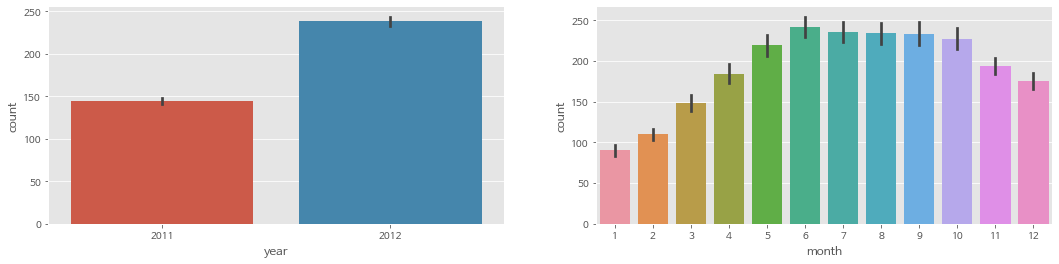

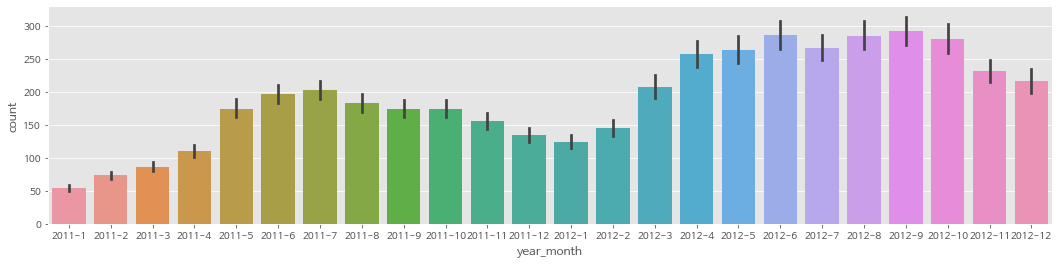

In [26]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(18, 4)

sns.barplot(data = train, x = "year", y = "count", ax = ax1)
sns.barplot(data = train, x = "month", y = "count", ax = ax2)

fig, ax3 = plt.subplots(nrows = 1, ncols = 1)
fig.set_size_inches(18, 4)

sns.barplot(data = train, x = "year_month", y = "count", ax = ax3)

- 2011년보다 2012년이 대여량이 더 많다.
- 겨울보다는 여름에 대여량이 많다.
- 2011년과 2012년 월별 데이터를 이어보면 전체적으로 증가하는 추세이다.

In [27]:
# trainWithoutOutliers
# abs는 절댓값을, mean은 산술 평균을, std는 표준 편차를 구하는 함수이다.
trainWithoutOutliers = train[np.abs(train["count"] - train["count"].mean()) <= (3 * train["count"].std())]

print(train.shape)
print(trainWithoutOutliers.shape)

(10886, 20)
(10739, 20)


((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909617))

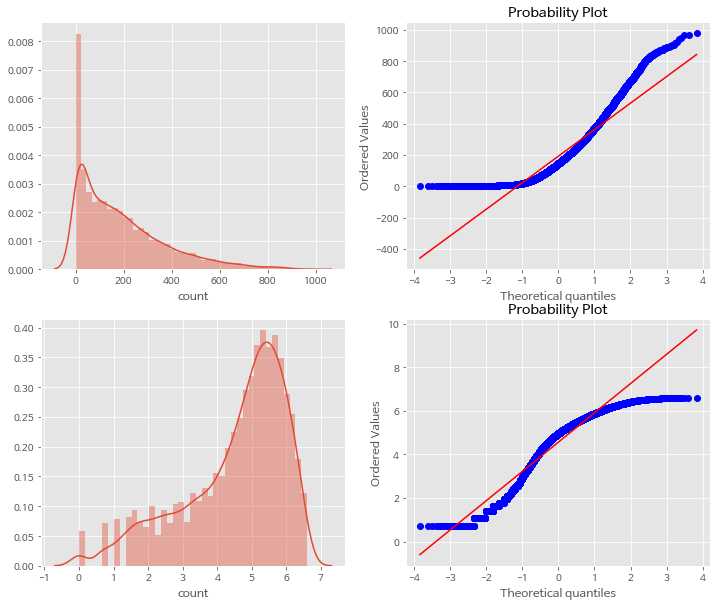

In [28]:
# count 값의 데이터 분포도를 파악

figure, axes = plt.subplots(ncols = 2, nrows = 2)
figure.set_size_inches(12, 10)

sns.distplot(train["count"], ax = axes[0][0])
stats.probplot(train["count"], dist = 'norm', fit=True, plot = axes[0][1])
sns.distplot(np.log(trainWithoutOutliers["count"]), ax = axes[1][0])
stats.probplot(np.log1p(trainWithoutOutliers["count"]), dist = 'norm', fit = True, plot = axes[1][1])

count 변수가 오른쪽에 치우쳐져 있다. 대부분의 기계학습은 종속변수가 normal이어야 하기에 정규분포를 갖는 것이 바람직하다. 대안으로 outlier data를 제거하고 count 변수에 로그를 씌워 변경해 봐도 정규분포를 따르지는 않지만, 이전 그래프보다는 좀 더 자세히 표현하고 있다.